In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pivottablejs import pivot_ui
import seaborn as sns

airbnb_data = "Resources/AB_NYC_2019.csv"
airbnb_df = pd.read_csv(airbnb_data, encoding="UTF-8")

In [113]:
AB_df = pd.DataFrame(airbnb_df)


In [114]:
NY_AB_reorganized = AB_df[["neighbourhood_group", "room_type", "price"]]
NY_AB_reorganized.head()



,neighbourhood_group,room_type,price
0,Brooklyn,Private room,149
1,Manhattan,Entire home/apt,225
2,Manhattan,Private room,150
3,Brooklyn,Entire home/apt,89
4,Manhattan,Entire home/apt,80


In [115]:
NY_renamed = NY_AB_reorganized.rename(columns={"neighbourhood_group": "Neighborhood", "room_type": "Room type"})
NY_renamed.head()



,Neighborhood,Room type,price
0,Brooklyn,Private room,149
1,Manhattan,Entire home/apt,225
2,Manhattan,Private room,150
3,Brooklyn,Entire home/apt,89
4,Manhattan,Entire home/apt,80


In [116]:
#groupby neighborhood, display neighborhood by room type, neighborhood by price

grouped_NYC_df = NY_renamed.groupby(['Neighborhood', 'Room type'])
grouped_NYC_df.count().head(15)


price
Neighborhood  Room type             
Bronx         Entire home/apt    379
              Private room       652
              Shared room         60
Brooklyn      Entire home/apt   9559
              Private room     10132
              Shared room        413
Manhattan     Entire home/apt  13199
              Private room      7982
              Shared room        480
Queens        Entire home/apt   2096
              Private room      3372
              Shared room        198
Staten Island Entire home/apt    176
              Private room       188
              Shared room          9

In [117]:
avg_price_NYC_df = pd.DataFrame(NY_renamed.groupby(['Neighborhood', 'Room type']).mean()['price'])
avg_price_NYC_df

price
Neighborhood  Room type                  
Bronx         Entire home/apt  127.506596
              Private room      66.788344
              Shared room       59.800000
Brooklyn      Entire home/apt  178.327545
              Private room      76.500099
              Shared room       50.527845
Manhattan     Entire home/apt  249.239109
              Private room     116.776622
              Shared room       88.977083
Queens        Entire home/apt  147.050573
              Private room      71.762456
              Shared room       69.020202
Staten Island Entire home/apt  173.846591
              Private room      62.292553
              Shared room       57.444444

In [153]:


avg_price_NYC_df.index.values; 
Neighborhood = map(lambda x: x[0], avg_price_NYC_df.index.values)
Room_types = map(lambda x: x[1], avg_price_NYC_df.index.values)
Prices = avg_price_NYC_df.values
Neighborhood = list(Neighborhood)
Room_types = list(Room_types)
Prices = Prices

newPrice = []
for price in Prices:
    newPrice.append(price[0])




In [155]:
avgprice = pd.DataFrame({"Neighborhood":Neighborhood, "Room_types":Room_types,"newPrice":newPrice})
avgprice.head()
pivot = avgprice.pivot(index="Neighborhood", columns="Room_types", values="newPrice")
pivot


Room_types,Entire home/apt,Private room,Shared room
Neighborhood,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


<Figure size 7200x7200 with 0 Axes>

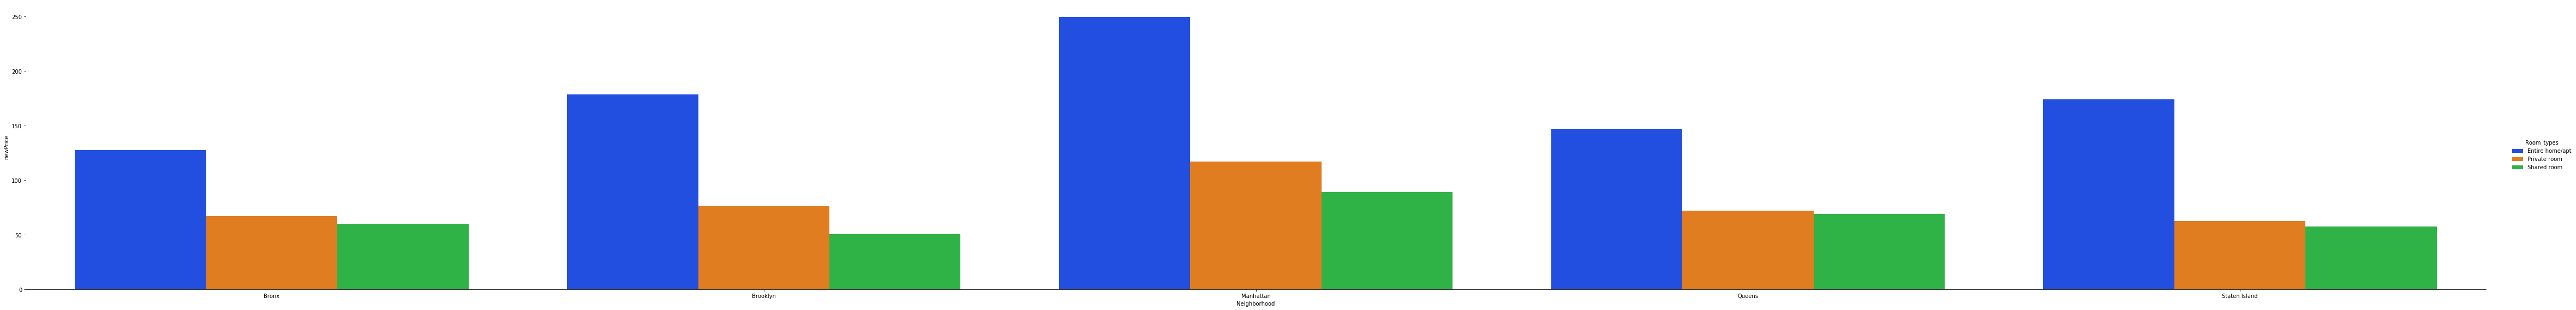

In [156]:
plt.figure(figsize=(100, 100))


g = sns.catplot(data=avgprice, x="Neighborhood", y="newPrice", hue="Room_types", kind="bar", aspect=8, height=8, palette="bright")

g.despine(left=True)

<Figure size 7200x7200 with 0 Axes>

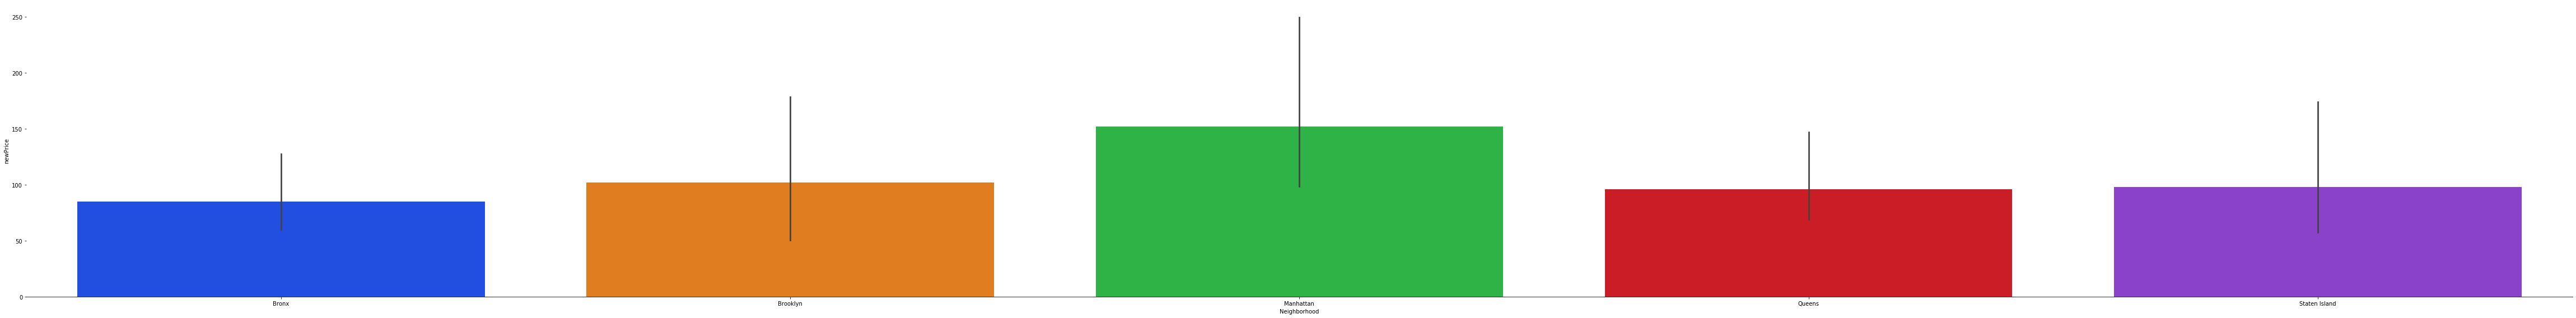

In [158]:
plt.figure(figsize=(100, 100))


g = sns.catplot(data=avgprice, x="Neighborhood", y="newPrice", kind="bar", aspect=8, height=8, palette="bright")

g.despine(left=True)

<Figure size 7200x7200 with 0 Axes>

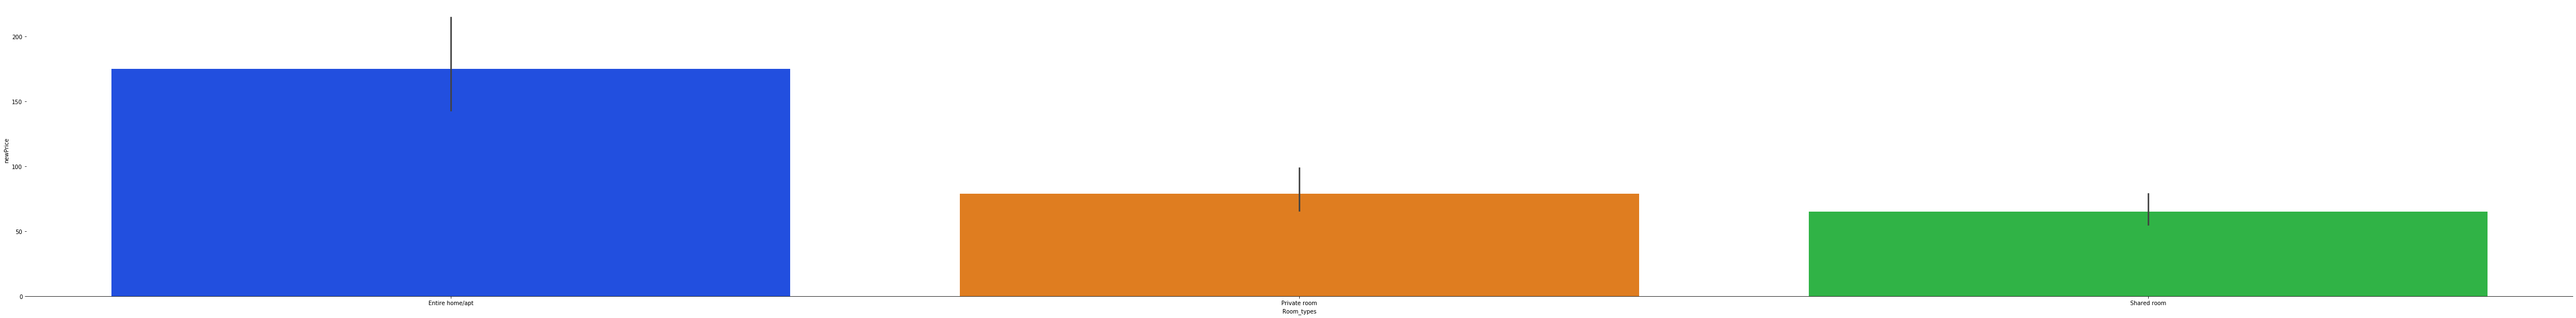

In [159]:
plt.figure(figsize=(100, 100))


g = sns.catplot(data=avgprice, x="Room_types", y="newPrice", kind="bar", aspect=8, height=8, palette="bright")

g.despine(left=True)

,Neighborhood,Room_types,newPrice
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573
